In [1]:
# import the necessary modules
import numpy as np
import matplotlib.pyplot as plt

# extra packages for interactive plots
import holoviews as hv
import panel as pn
pn.extension('mathjax')

In [2]:
x = np.linspace(0, 4, 200)
y = np.linspace(0, 4, 200)
beta = 10
alpha = 5
K = 1
n = 3

In [3]:
X_prod = beta * x**n/(K**n + x**n)
Y_prod = beta * y**n/(K**n + y**n)

$\text{Diffeqs: f(Y) - } \alpha$

$\text{f(X) - }\alpha$

In [4]:
null_x = Y_prod/alpha
null_y = X_prod/alpha

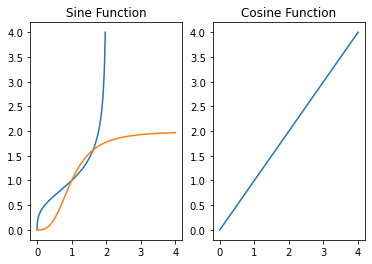

In [5]:
figure, axis = plt.subplots(1, 2)

axis[0].plot(null_x, y)
axis[0].plot(x, null_y)
axis[0].set_title("Sine Function")
  
# For Cosine Function
axis[1].plot(x, y)
axis[1].set_title("Cosine Function")

plt.show()

In [6]:
# initialize our sliders
beta_slider = pn.widgets.FloatSlider(name="beta", start=5, end=10, step=0.5, value=10)
K_slider = pn.widgets.FloatSlider(name="K", start=0.1, end=5, step=0.1, value=1)
alpha_slider = pn.widgets.FloatSlider(name="alpha", start=0.1, end=5, step=0.1, value=1)
n_slider = pn.widgets.FloatSlider(name="n", start=1, end=6, step=1, value=1)

# define the plotting function, such that it depends on the values of the slider
@pn.depends(beta_slider.param.value, K_slider.param.value, alpha_slider.param.value, n_slider.param.value )
def rate_plot_NAR(beta, K, alpha, n):
    
    # x and y values to plot
    x = np.linspace(0, 10, 200)
    y = np.linspace(0, 10, 200)
    y_null = (beta * (K**n)/(K**n + x**n)) / alpha
    x_null = (beta * (K**n)/(K**n + y**n)) / alpha
    
    # specify the list of plots we want
    list_of_curves = [
    hv.Curve(data=(x, y_null), kdims=["x"], vdims=["dx/dt"], label="y_null").opts(color="black"),
    hv.Curve(data=(x_null, y), kdims=["x"], vdims=["dx/dt"], label="x_null").opts(color="red")
    ]
    
    # overlay all the plots, fix ylim so it doesn't change with the sliders
    return hv.Overlay(list_of_curves).opts(ylim=(0, 11), show_grid=True, width=400, height=300, legend_position='bottom_right')

# layout the sliders and the plot
pn.Column(beta_slider, K_slider, alpha_slider, n_slider, rate_plot_NAR, width=300)

Column(width=300)
    [0] FloatSlider(end=10, name='beta', start=5, step=0.5, value=10)
    [1] FloatSlider(end=5, name='K', start=0.1, value=1)
    [2] FloatSlider(end=5, name='alpha', start=0.1, value=1)
    [3] FloatSlider(end=6, name='n', start=1, step=1, value=1)
    [4] ParamFunction(function)